### Week 10 Activities

**1. Read data samples from `week-10/datasets/Clustering-Datasets-master/02. Synthetic/3MC.csv`. There are 400 two-dimensional (i.e., the dimension being x and y) samples in the csv.**

In [2]:
import pandas as pd
df = pd.read_csv('datasets/3MC.csv')
df.head()

,x,y,class
0,-3.053,0.787,1
1,-2.535,1.088,1
2,-2.667,0.611,1
3,-2.598,1.323,1
4,2.173,0.864,1


**2. Split the datset into training and test (80%/20% split)**


In [6]:
X = df.drop(columns=['class'])
y = df['class']
X.head(), y.head()

(       x      y
 0 -3.053  0.787
 1 -2.535  1.088
 2 -2.667  0.611
 3 -2.598  1.323
 4  2.173  0.864,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: class, dtype: int64)

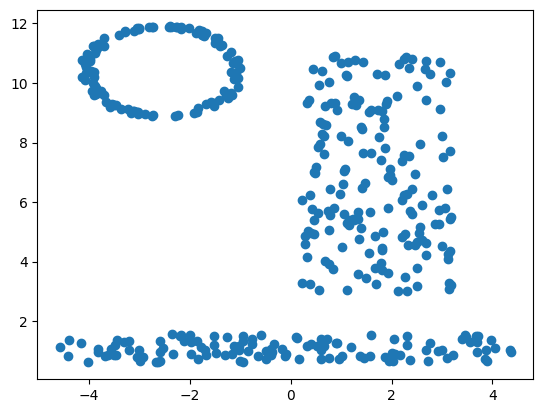

In [60]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 2) (320,)
(80, 2) (80,)


**3. Use the training set to find 3 clusters of the dataset. **PLEASE DO NOT USE scikit-learn** based clustering libraries. Write your own k-means method implementation.**
- 1. Randomly select 3 centroids from the dataset
- 2. For each data point, calculate the Euclidean distance to each of the centroids, and assign the point to the nearest centroid’s cluster.
- 3. For each cluster, recalculate the centroid by finding the mean of all points assigned to that cluster.
- 4. Repeat steps 2 and 3 until the centroids no longer change significantly (i.e., convergence) or until a maximum number of iterations is reached.

In [57]:
import numpy as np
import random


def df_to_list():
    data_values = df.drop(columns='class')
    return data_values.values.tolist()

def random_centroids(data, k):
    centroids = random.sample(data,k)
    clusters = [[] for _ in centroids]
    for point in data: 
        distances = [np.linalg.norm(np.array(point) - np.array(centroid)) for centroid in centroids]
        closest_centroid_index = distances.index(min(distances))
        clusters[closest_centroid_index].append(point)
    return distances

data = df_to_list()
result = (random_centroids(data,3))
print(result)




[np.float64(11.64716811074692), np.float64(11.315083959034505), np.float64(10.578812835096384)]


4. Evaluate clustering performances in task #3 based on **SSE**, **RandIndex**, **Silhouette Coefficient**.


5. If you increase number of clusters in task #3 what type of performance changes do you observe? Please use the elbow technique to determine best number of clustering for the dataset.


6. Just think about implementing hierarchical clustering, producing a dendrogram and apply a cut to obtain the desired number of clusters.
